Hyperparameters : that we give before the model training start and are constant during the model training. Training of our model(i.e. the determination of the model parameters) are depependent on the hyperparameters we have set before.

some hyperparameters are :
1. leaning rate(LR) factor of gradient descent
2. number of epochs
3. n_estimators = number of decision tree in random forest model we want


model parameters = weights and bias

Hyperparameter tuning = hyperparameter optimization = refers to the process of chossing the optimum set of hyperparameters for a machine learning model

GridSearchCV -> All possible combinations of hyperparamets sets that we have given, are tested and best one is given as an output. Computationally expensive since all possible combinations are checked

RandomizedSearchCV -> only some random combinations are picked to be tested. Random combinnations me best one is considered to be the best hyperparameter.
Less complex computationally

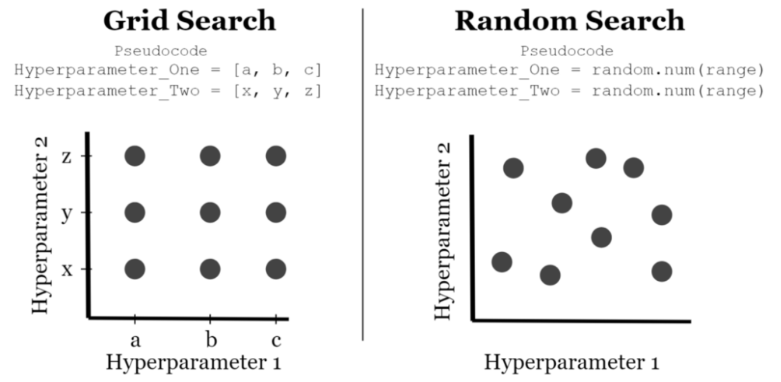

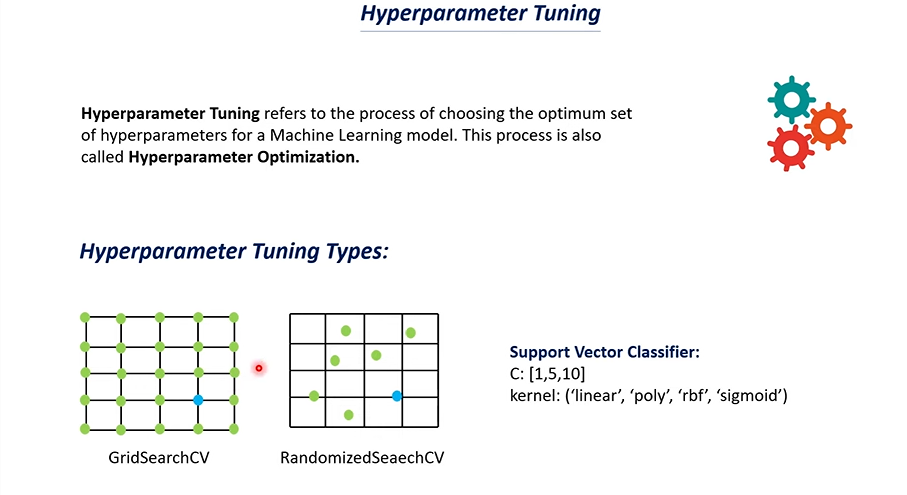

# GridSearchCV and RandomizedSearchCV - Python implementation

In [1]:
# importing the dependencies
import numpy as np
import pandas as pd
import sklearn.datasets
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [2]:
# loading the data from sklearn
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

In [3]:
print(breast_cancer_dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [5]:
breast_cancer_dataset.keys()
# since sklearn datasets are in form of distionaries

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
# loading the data to a dataframe
data_frame = pd.DataFrame(breast_cancer_dataset.data, columns=breast_cancer_dataset.feature_names)

In [6]:
data_frame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
data_frame.shape

(569, 30)

In [8]:
data_frame.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [11]:
# data_frame['label'].value_counts()

In [12]:
# adding the 'target' column with name label

In [13]:
data_frame['label'] = breast_cancer_dataset.target

In [14]:
data_frame['label'].value_counts()
# 1 - benign, 0 - melingnent, dataset me diya tha

1    357
0    212
Name: label, dtype: int64

In [15]:
# separating features and target from the dataset
X = data_frame.drop(columns = 'label', axis = 1)
Y = data_frame['label']

In [16]:
print(X)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [18]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: label, Length: 569, dtype: int64


In [19]:
X = np.asarray(X)
Y = np.asarray(Y)

# grid search CV

GridSearch CV is used for determining the best parameter for our model

In [49]:
# loading the SVC model
model = SVC()

In [50]:
# hyperparameters

parameters = {
    'kernel':['linear','poly','rbf','sigmoid'],
    'C' : [1,5,10,20]
}

# these two C and kernel are hyperparameters for svc. Best combination we are going to find for this svc model
# all the combinations of kernel and C values will be checked.

In [51]:
# grid search
classifier = GridSearchCV(model, parameters, cv=5) # cv = class validation, data split in different folds, and analysed each splitting
 # instead of train test split, we are doing the cross validation method

In [52]:
# fitting the data to our model
classifier.fit(X,Y) # model training using all the combination(4*4 = 16) and for each 5 splits, and best one is picked

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 5, 10, 20],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [53]:
classifier.cv_results_

{'mean_fit_time': array([1.59791594e+00, 3.67660522e-03, 4.35829163e-03, 1.63151741e-02,
        2.97487950e+00, 3.67288589e-03, 3.95836830e-03, 1.40885353e-02,
        4.50191278e+00, 4.11229134e-03, 3.88755798e-03, 1.36478424e-02,
        7.35697360e+00, 7.80968666e-03, 6.84318542e-03, 2.09197998e-02]),
 'std_fit_time': array([4.23844336e-01, 9.37934448e-05, 1.06366114e-04, 3.30837782e-03,
        7.78706040e-01, 4.04340011e-04, 1.59952080e-04, 5.77156034e-04,
        8.92806263e-01, 2.68044940e-04, 1.47148625e-04, 6.63700190e-04,
        2.46704532e+00, 2.15376972e-04, 4.94109551e-04, 1.48737906e-03]),
 'mean_score_time': array([0.00133619, 0.00112729, 0.00159216, 0.00389071, 0.00110712,
        0.0010601 , 0.00141263, 0.00369844, 0.0010839 , 0.00098124,
        0.00147285, 0.00344062, 0.00134754, 0.00185342, 0.00245461,
        0.00510855]),
 'std_score_time': array([2.31660359e-04, 4.42255604e-05, 4.12785124e-05, 4.16377756e-04,
        2.94778710e-05, 6.18459081e-05, 6.29294989e-

In [54]:
# best parameter

best_parameter = classifier.best_params_

print(best_parameter)

{'C': 10, 'kernel': 'linear'}


In [55]:
# highest accuracy

highest_accuracy = classifier.best_score_
print(highest_accuracy) # at the best linear kernal and 10 c value

0.9525694767893185


In [56]:
# loading the results to pandas dataframe
result = pd.DataFrame(classifier.cv_results_)

In [57]:
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.597916,0.423844,0.001336,0.000232,1,linear,"{'C': 1, 'kernel': 'linear'}",0.947368,0.929825,0.973684,0.921053,0.955752,0.945536,0.018689,4
1,0.003677,0.000094,0.001127,0.000044,1,poly,"{'C': 1, 'kernel': 'poly'}",0.842105,0.885965,0.929825,0.947368,0.938053,0.908663,0.039382,12
2,0.004358,0.000106,0.001592,0.000041,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.850877,0.894737,0.929825,0.947368,0.938053,0.912172,0.035444,11
3,0.016315,0.003308,0.003891,0.000416,1,sigmoid,"{'C': 1, 'kernel': 'sigmoid'}",0.543860,0.456140,0.464912,0.385965,0.451327,0.460441,0.050253,13
4,2.974880,0.778706,0.001107,0.000029,5,linear,"{'C': 5, 'kernel': 'linear'}",0.947368,0.938596,0.973684,0.929825,0.964602,0.950815,0.016216,2


In [58]:
result.shape
# yes as expected all combinations = 16 were tested

(16, 15)

In [59]:
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.597916,0.423844,0.001336,0.000232,1,linear,"{'C': 1, 'kernel': 'linear'}",0.947368,0.929825,0.973684,0.921053,0.955752,0.945536,0.018689,4
1,0.003677,0.000094,0.001127,0.000044,1,poly,"{'C': 1, 'kernel': 'poly'}",0.842105,0.885965,0.929825,0.947368,0.938053,0.908663,0.039382,12
2,0.004358,0.000106,0.001592,0.000041,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.850877,0.894737,0.929825,0.947368,0.938053,0.912172,0.035444,11
3,0.016315,0.003308,0.003891,0.000416,1,sigmoid,"{'C': 1, 'kernel': 'sigmoid'}",0.543860,0.456140,0.464912,0.385965,0.451327,0.460441,0.050253,13
4,2.974880,0.778706,0.001107,0.000029,5,linear,"{'C': 5, 'kernel': 'linear'}",0.947368,0.938596,0.973684,0.929825,0.964602,0.950815,0.016216,2
5,0.003673,0.000404,0.001060,0.000062,5,poly,"{'C': 5, 'kernel': 'poly'}",0.885965,0.912281,0.921053,0.938596,0.955752,0.922729,0.023689,6
6,0.003958,0.000160,0.001413,0.000063,5,rbf,"{'C': 5, 'kernel': 'rbf'}",0.885965,0.929825,0.938596,0.947368,0.955752,0.931501,0.024358,5
7,0.014089,0.000577,0.003698,0.000657,5,sigmoid,"{'C': 5, 'kernel': 'sigmoid'}",0.491228,0.421053,0.421053,0.350877,0.371681,0.411178,0.048578,14
8,4.501913,0.892806,0.001084,0.000048,10,linear,"{'C': 10, 'kernel': 'linear'}",0.938596,0.938596,0.973684,0.947368,0.964602,0.952569,0.014200,1
9,0.004112,0.000268,0.000981,0.000060,10,poly,"{'C': 10, 'kernel': 'poly'}",0.885965,0.921053,0.903509,0.938596,0.955752,0.920975,0.024701,8


In [60]:

grid_search_result = result[['param_C','param_kernel','mean_test_score']]
grid_search_result
# will show all the combinations with there accuracy

,param_C,param_kernel,mean_test_score
0,1,linear,0.945536
1,1,poly,0.908663
2,1,rbf,0.912172
3,1,sigmoid,0.460441
4,5,linear,0.950815
5,5,poly,0.922729
6,5,rbf,0.931501
7,5,sigmoid,0.411178
8,10,linear,0.952569
9,10,poly,0.920975


the highest accuracy we are getiing = 95.2 %

best parrameter = {c=10, kernel =linear}

here 4 c values and 4 kernel = 16 combinations : tested for all : k/a grid search CV

# **RandomizedSearchCV**


In [61]:
# exactly same thing

In [62]:
model = SVC()

In [63]:
# hyperparameteres

parameters = {
    'kernel':['linear','poly','rbf','sigmoid'],
    'C':[1,5,10,20]
}

In [64]:
# randomized search cv
classifier = RandomizedSearchCV(model, parameters, cv=5)
# randomized does not take all, will take some combinations, but again on each combinations, it will do cross validation 5 times. that is same

In [65]:
# fitting the data to our model
classifier.fit(X,Y)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [1, 5, 10, 20],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']})

In [66]:
classifier.cv_results_

{'mean_fit_time': array([4.69851494e-03, 4.45713997e-03, 7.67863789e+00, 4.43534851e-03,
        3.78041267e-03, 5.81822395e-03, 3.01843872e+00, 3.75843048e-03,
        1.51960373e-02, 4.17356491e-03]),
 'std_fit_time': array([8.95996928e-04, 1.25450283e-04, 2.56161954e+00, 2.65550070e-04,
        1.61016930e-04, 1.47799596e-03, 8.55252784e-01, 3.16029200e-04,
        6.66967687e-04, 1.50885578e-04]),
 'mean_score_time': array([0.00143285, 0.00162897, 0.00107121, 0.00106683, 0.00115991,
        0.00149961, 0.00119429, 0.00101895, 0.00399513, 0.00146775]),
 'std_score_time': array([6.33853448e-05, 5.73164611e-05, 4.55932132e-05, 5.59849469e-05,
        4.31415108e-05, 4.52873977e-04, 2.28651318e-04, 5.44881969e-05,
        2.88822884e-04, 3.84885870e-05]),
 'param_kernel': masked_array(data=['rbf', 'rbf', 'linear', 'poly', 'poly', 'poly',
                    'linear', 'poly', 'sigmoid', 'rbf'],
              mask=[False, False, False, False, False, False, False, False,
                 

In [67]:
# best parameters

best_parameters = classifier.best_params_
print(best_parameters)


{'kernel': 'linear', 'C': 5}


In [68]:
# highest accuracy

highest_accuracy = classifier.best_score_
print(highest_accuracy)

0.9508150908244062


In [69]:
# loading the result into pandas dataframe : to get to know what all are combinations tested, what were their accuracies

In [70]:
results = pd.DataFrame(classifier.cv_results_)

In [71]:
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004699,0.000896,0.001433,0.000063,rbf,20,"{'kernel': 'rbf', 'C': 20}",0.877193,0.921053,0.921053,0.947368,0.938053,0.920944,0.024105,6
1,0.004457,0.000125,0.001629,0.000057,rbf,1,"{'kernel': 'rbf', 'C': 1}",0.850877,0.894737,0.929825,0.947368,0.938053,0.912172,0.035444,8
2,7.678638,2.561620,0.001071,0.000046,linear,20,"{'kernel': 'linear', 'C': 20}",0.929825,0.956140,0.956140,0.938596,0.964602,0.949061,0.012816,2
3,0.004435,0.000266,0.001067,0.000056,poly,20,"{'kernel': 'poly', 'C': 20}",0.877193,0.921053,0.903509,0.938596,0.955752,0.919221,0.027300,7
4,0.003780,0.000161,0.001160,0.000043,poly,1,"{'kernel': 'poly', 'C': 1}",0.842105,0.885965,0.929825,0.947368,0.938053,0.908663,0.039382,9


In [72]:
results.shape

(10, 15)

In [74]:
randomized_search_result = results[['param_kernel','param_C','mean_test_score']]
randomized_search_result

,param_kernel,param_C,mean_test_score
0,rbf,20,0.920944
1,rbf,1,0.912172
2,linear,20,0.949061
3,poly,20,0.919221
4,poly,1,0.908663
5,poly,10,0.920975
6,linear,5,0.950815
7,poly,5,0.922729
8,sigmoid,1,0.460441
9,rbf,10,0.922714


the highest accuracy we are getiing = 95.08 %

best parrameter = {c=5, kernel =linear}

remember these are just a few hyperparameters, rest are taken by defualt values. You can use other hyperparameters into account as well

In [ ]:
# so now when we load model, we will load as model = SVC(C=10, 'kernel'='linear'). once we do the hyperparametrs tuning